<a href="https://colab.research.google.com/github/Oec8cek/Ai-Understanding/blob/main/%EC%98%A4%EC%8A%B9%EC%97%B011_0514_%ED%95%84%EC%88%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 필수과제
- 시계열 데이터와 공공데이터를 병합하여 심도있는 분석을 진행하는 과제입니다. 
- 시계열 데이터와 공공데이터 간의 공통 키로 병합을 수행한 후, 
- 시계열 데이터의 시각화를 통해 인사이트를 도출하고 더 심층적인 분석을 진행합니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
# 시계열 데이터 불러오기
jeju = pd.read_csv('/content/drive/MyDrive/jeju_traffic.csv')

# 필요없는 열 제거
jeju = jeju.drop(['id','day_of_week','base_hour','lane_count', 'road_rating', 'road_name', 'road_type', 'start_node_name', 'end_node_name','start_turn_restricted', 'multi_linked', 'connect_code', 'vehicle_restricted','height_restricted','end_turn_restricted','start_latitude',	'start_longitude',	'end_latitude',	'end_longitude'],axis=1)

# **column에 대한 설명**


base_date 날짜

maximum_speed_limit 최고속도제한

weight_restricted 통과제한하중

height_restricted 통과제한높이

target 평균속도(km)

In [ ]:
# 제주 2022년의 교통상황만 뜯어서 보자(너무 크면 안 열리니까...)

jeju_22 = jeju[jeju['base_date'].astype(str).str.contains('2022')]
jeju_22

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/jeju_weather.csv',encoding='EUC-kR')

# 결측치가 있는 행 제거
weather = weather.dropna()
weather = weather.drop(columns=['Unnamed: 8'])

# jeju_2022 데이터프레임과 합병하기 위해 열 이름 영어로 바꾸기
reN = {'\t\t지점번호':'station_code',
       '지점명':'station_name',
       '일시':'base_date',
       '평균기온(℃)':'avg_temp',
       '최고기온(℃)':'max_temp',
       '\t최고기온시각':'time_max',
       '최저기온(℃)':'min_temp',
       '최저기온시각일교차':'temp_range'
      }
weather = weather.rename(columns=reN)

# 문자열에 의미없는 특수문자 제거
weather['station_code']= weather['station_code'].astype(int)
weather['base_date']= weather['base_date'].str.replace('-','').astype(int)
weather['base_date'] = weather['base_date'].astype(int)
weather = weather[(weather['base_date']>=20220101) & (weather['base_date']<20220801)]

weather = weather.sort_values('base_date')
weather.reset_index(inplace=True, drop=True)
weather

In [ ]:
# 중복되는 값들이 많고 도로명마다 조사한거니까 너무 따질 feature가 많아 
# 그냥 시계열 데이터의 시간값을 기준으로 평균 내서 하나로 줄여보자
# 그리고 2022년은 1월부터 7월까지만 기록이 있으니까 늦겨울~초여름까지만 살펴보도록 하자

In [ ]:
# 중복 행 제거하고 열의 평균값으로 새로운 행 추가
jeju_22 = jeju_22.groupby('base_date').mean().reset_index()

# 중복 행 제거
jeju_22 = jeju_22.drop_duplicates()
df1 = jeju_22.copy()
df1

In [ ]:
# weather에 대한 데이터도 jeju_01 데이터와 마찬가지로...
# 일단 병합할 데이터에서 필요없는 열 지우기
wdf = weather.drop(['time_max','temp_range','station_name','station_code'],axis=1)

# 중복 행 제거하고 열의 평균값으로 새로운 행 추가
wdf = wdf.groupby('base_date').mean().reset_index()

# 중복 행 제거
wdf = wdf.drop_duplicates()
df2 = wdf.copy()
df2

In [98]:
# df1와 df2 데이터 병합
# 공통된 column을 위하여 위에서 열 이름 바꿈.

test = pd.merge(df1,df2, on='base_date')
test.head()

,base_date,maximum_speed_limit,weight_restricted,target,avg_temp,max_temp,min_temp
0,20220101,61.363636,8210.909091,44.663636,4.9,8.9,0.9
1,20220102,61.044776,5047.761194,44.253731,7.2,11.4,4.2
2,20220103,62.162162,5023.423423,42.306306,6.0,10.7,2.5
3,20220104,62.238806,4432.835821,42.858209,6.8,9.3,4.8
4,20220105,61.274510,4235.294118,40.509804,5.8,6.8,3.3


In [ ]:
# 평균 기온 변화를 월별로 보고싶지 않아? 난 보고싶단 말이지...

In [64]:
# 1월부터 7월까지
test['base_date'] = test['base_date'].astype(int)

m1 = test[(test['base_date']>=20220101) & (test['base_date']<20220131)]
m1 = m1.sort_values('base_date')

m2 = test[(test['base_date']>=20220201) & (test['base_date']<20220231)]
m2 = m2.sort_values('base_date')

m3 = test[(test['base_date']>=20220301) & (test['base_date']<20220331)]
m3 = m3.sort_values('base_date')

m4 = test[(test['base_date']>=20220401) & (test['base_date']<20220431)]
m4 = m4.sort_values('base_date')

m5 = test[(test['base_date']>=20220501) & (test['base_date']<2022531)]
m5 = m5.sort_values('base_date')

m6 = test[(test['base_date']>=20220601) & (test['base_date']<20220631)]
m6 = m6.sort_values('base_date')

m7 = test[(test['base_date']>=20220701) & (test['base_date']<20220731)]
m7 = m7.sort_values('base_date')

In [65]:
m1_means = m1.iloc[:,1:].mean().tolist()
m1_means.insert(0,202201)

m2_means = m2.iloc[:,1:].mean().tolist()
m2_means.insert(0,202202)

m3_means = m3.iloc[:,1:].mean().tolist()
m3_means.insert(0,202203)

m4_means = m4.iloc[:,1:].mean().tolist()
m4_means.insert(0,202204)

m5_means = m5.iloc[:,1:].mean().tolist()
m5_means.insert(0,202205)

m6_means = m6.iloc[:,1:].mean().tolist()
m6_means.insert(0,202206)

m7_means = m7.iloc[:,1:].mean().tolist()
m7_means.insert(0,202207)

col = [m1_means, m2_means, m3_means, m4_means, m5_means, m6_means, m7_means]

In [87]:
# 제주도 월별 교통/기온 통계 보기!

test_df = pd.DataFrame(columns=test.columns)
test_df

,base_date,maximum_speed_limit,weight_restricted,target,avg_temp,max_temp,min_temp


In [75]:
import numpy as np

In [88]:
for i in range(len(col)):
  test_df.loc[i] = col[i]

# base_date 열의 값을 문자열로 변환
test_df['base_date'] = test_df['base_date'].astype(str)

# "20220"을 빈 문자열로 대체하여 삭제
test_df['base_date'] = test_df['base_date'].str.replace("20220", "")
test_df = test_df.sort_values('base_date')

# Nan값은 0으로 바꾸자.(알 수 없는 데이터니까)
# test_df = test_df.fillna(0)

test_df['stdv'] = np.abs(test_df['maximum_speed_limit'] - test_df['target'])
test_df

,base_date,maximum_speed_limit,weight_restricted,target,avg_temp,max_temp,min_temp,stdv
0,1.0,61.456971,5654.575867,43.244528,6.243333,9.100000,3.903333,18.212443
1,2.0,61.454923,5748.337990,43.820337,5.564286,8.660714,2.907143,17.634586
2,3.0,61.675973,5661.434304,44.430687,11.423333,15.490000,7.790000,17.245285
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,61.404391,5219.586907,42.925828,23.893333,27.493333,21.060000,18.478564
6,7.0,58.549763,3544.261395,36.565446,28.390000,31.893333,25.696667,21.984317


In [69]:
import matplotlib.pyplot as plt

In [105]:
m1['base_date'] = m1['base_date'].astype(str)
m1['base_date'] = m1['base_date'].str.replace("202201", "")
m1['base_date'] = m1['base_date'].astype(int)

m2['base_date'] = m2['base_date'].astype(str)
m2['base_date'] = m2['base_date'].str.replace("202202", "")
m2['base_date'] = m2['base_date'].astype(int)

m3['base_date'] = m3['base_date'].astype(str)
m3['base_date'] = m3['base_date'].str.replace("202203", "")
m3['base_date'] = m3['base_date'].astype(int)

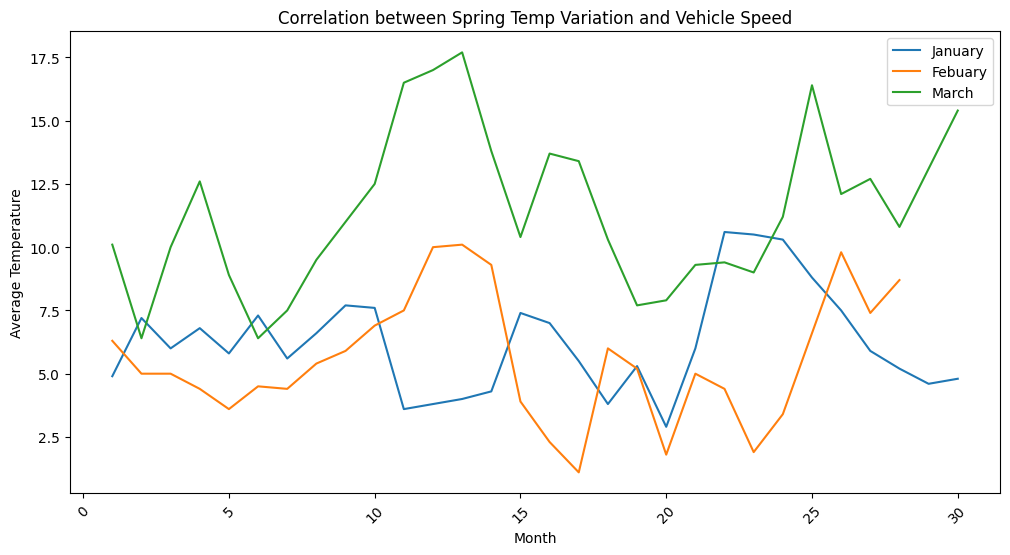

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(m1['base_date'], m1['avg_temp'],label='January')
plt.plot(m2['base_date'], m2['avg_temp'],label='Febuary')
plt.plot(m3['base_date'], m3['avg_temp'],label='March')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Correlation between Spring Temp Variation and Vehicle Speed')
plt.legend()
plt.xticks(rotation=45)
plt.show()

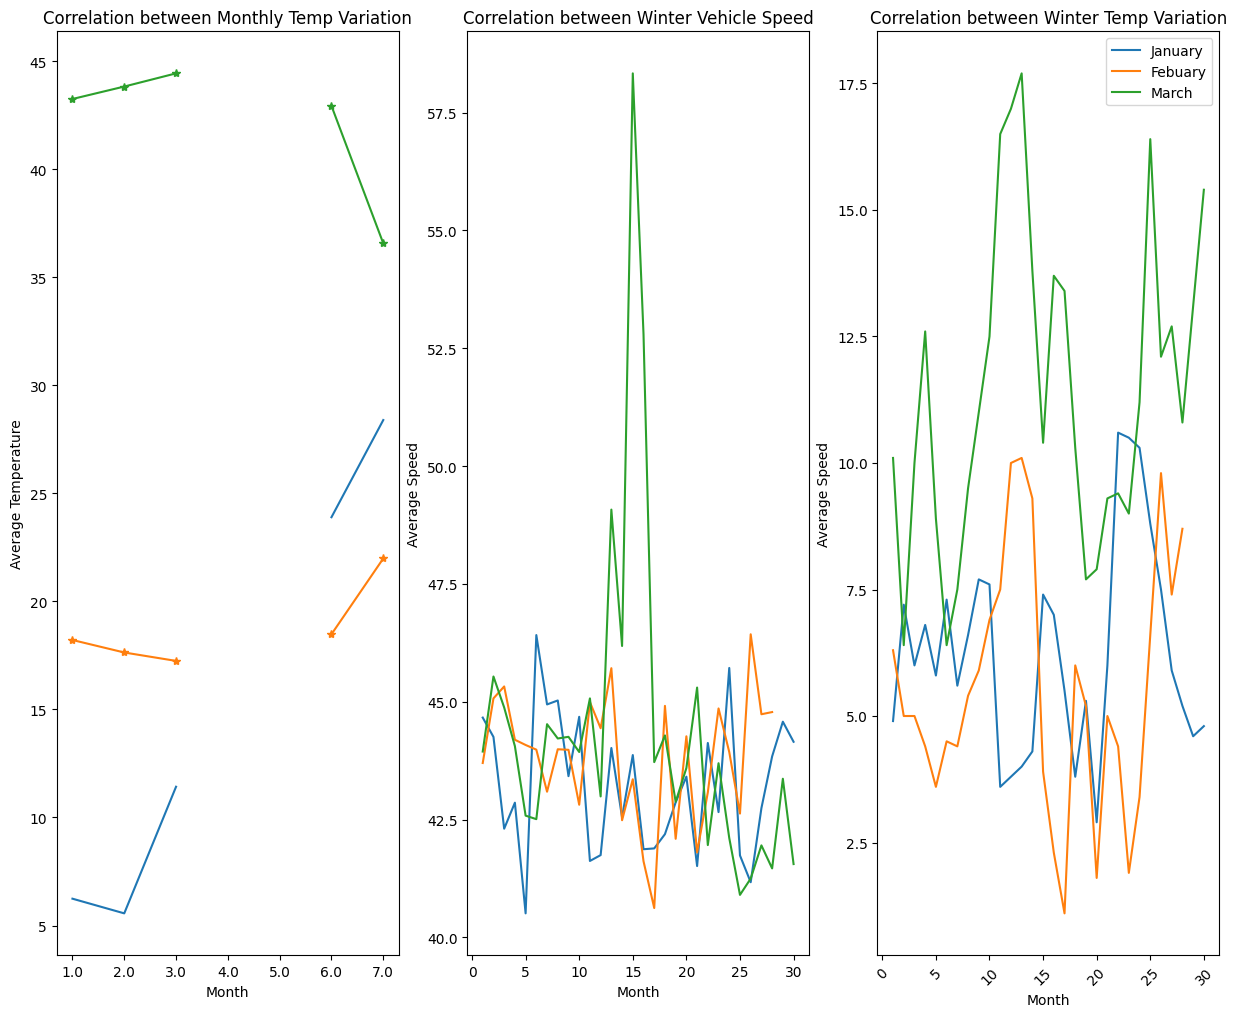

In [121]:
# 제주도에서 상반기 월별 평균 기온과 평균 속도를 알아보자

fig, ax = plt.subplots(1,3,figsize=(15, 12))

ax[0].plot(test_df['base_date'], test_df['avg_temp'],label='avg temp')
ax[0].plot(test_df['base_date'], test_df['stdv'], marker='*',label='stdv')
ax[0].plot(test_df['base_date'], test_df['target'], marker='*',label='target')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Average Temperature')
ax[0].set_title('Correlation between Monthly Temp Variation')

ax[1].plot(m1['base_date'], m1['target'],label='January')
ax[1].plot(m2['base_date'], m2['target'],label='Febuary')
ax[1].plot(m3['base_date'], m3['target'],label='March')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Average Speed')
ax[1].set_title('Correlation between Winter Vehicle Speed')

ax[2].plot(m1['base_date'], m1['avg_temp'],label='January')
ax[2].plot(m2['base_date'], m2['avg_temp'],label='Febuary')
ax[2].plot(m3['base_date'], m3['avg_temp'],label='March')
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Average Speed')
ax[2].set_title('Correlation between Winter Temp Variation')


plt.legend()
plt.xticks(rotation=45)
plt.show()

1월-3월까지(겨울-초봄)는 기온이 상대적으로 낮고 최대제한속도와 평균 속도 차이가 감소하며,
반면에 5-7월(늦봄-여름)에는 급격히 기온이 증가함에 따라 최대제한속도와 평균 속도 차이가 증가함을 통해 

우리는 기온이 낮을때는 사람들이 여행을 오거나 하는 등의 유동인구가 적어서 차량 속도가 증가하는데 반해 기온이 올라가면 제주도로 관광도 많이 오고 돌아다니기 좋은 날씨라서 차량들이 많이 나와 속도가 감소한다고 볼 수 있다.